<a href="https://colab.research.google.com/github/goeunleee/deeplearning_stuey/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D2%EC%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

dataset_path = tf.keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

#######################################################

import pandas as pd
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values = "?", comment='\t',  sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

#######################################################
# 결측치 확인하기
dataset.isna().sum()

# 결측치 제거하기
dataset = dataset.dropna()


# Origin열을 범주형 원-핫 엔코딩 변환
origin = dataset.pop('Origin')  # Origin컬럼을 삭제하고 origin에 보관

dataset['USA'] = (origin == 1) * 0.1
dataset['Europe'] = (origin == 2) * 0.1
dataset['Japan'] = (origin == 3) * 0.1

In [ ]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,0.1,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,0.1,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,0.1,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,0.1,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,0.1,0.0,0.0


In [ ]:
##############################################
# 80%로 분할하기
train_dataset = dataset.sample(frac=0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset


##############################################
# standardscale

trans_stats = train_dataset.describe()
trans_stats.pop("MPG")  # label에 속하는 항목은 제거
trans_stats = trans_stats.transpose()

#############################################
# train_dataset와 test_dataset에서 MPG항목만 labels로 옮김

train_labels = train_dataset.pop("MPG")
test_labels = test_dataset.pop("MPG")

# train_dataset, train_labels, test_dataset, test_labels
############################################
# standard scale
def norm(x):
  return (x-trans_stats['mean']) / trans_stats['std']

train_dataset = norm(train_dataset)
train_dataset

test_dataset = norm(test_dataset)

#############################################
# 모델 생성
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(64, activation="relu", input_shape=[len(train_dataset.keys())]),
  layers.Dense(64, activation="relu"),
  layers.Dense(1)
])

model.summary()

###########################################
optimizer = tf.keras.optimizers.SGD(lr=0.01)
#회귀 : loss:mse로 지표(metrics)는 mae
model.compile(optimizer=optimizer, loss="mse", metrics=["mae", "mse"])

###########################################
#학습하기 1000
# validation_split=0.2
history = model.fit(train_dataset, train_labels, epochs=1000, validation_split=0.2)

history.history.keys()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
8/8 [==============================] - 0s 19ms/step - loss: 336.8155 - mae: 15.6998 - mse: 336.8155 - val_loss: 280.2402 - val_mae: 15.2935 - val_mse: 280.2402
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 101.4602 - mae: 7.5340 - mse: 101.4602 - val_loss: 126.0692 - val_mae: 8.9295 - val_mse: 126.0692
Epoch 3/1000
8/8 [=====================

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import matplotlib.pyplot as plt
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

In [ ]:
# 데이터 프레임으로 만들기
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,336.815521,15.699776,336.815521,280.240234,15.293508,280.240234,0
1,101.460205,7.533990,101.460205,126.069191,8.929481,126.069191,1
2,167.030319,9.340543,167.030319,443.456238,19.771544,443.456238,2
3,188.419098,11.728955,188.419098,32.933655,4.274022,32.933655,3
4,63.238415,6.013675,63.238415,37.947243,4.515176,37.947243,4
...,...,...,...,...,...,...,...
995,2.521884,1.047917,2.521884,9.406240,2.292334,9.406240,995
996,1.756034,0.854875,1.756034,8.875791,2.183803,8.875791,996
997,1.233756,0.641560,1.233756,9.881400,2.194902,9.881400,997
998,1.949136,0.892960,1.949136,9.203988,2.098930,9.203988,998


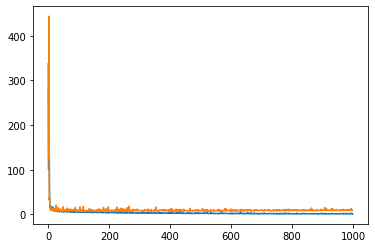

In [ ]:
# 시각화 하기
import matplotlib.pyplot as plt

plt.plot(hist['epoch'], hist['mse'])
plt.plot(hist['epoch'], hist['val_mse'])
plt.show()


In [ ]:
# 주택가격 예측하기_회귀
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [ ]:
import pandas as pd

housing = boston_housing.load_data()

housing = pd.DataFrame()
housing


""


In [ ]:
'''x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)

train_X = train_X - x_mean
train_X = train_X / x_std

test_X = test_X - x_mean
test_X = test_X / x_std

###################################
y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)

train_Y = train_Y - y_mean
train_Y = train_Y / y_std

test_Y = test_Y - y_mean
test_Y = test_Y / y_std

###################################

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse', metrics="mse")
model.summary()

##################################

tf.keras.utils.plot_model(model)

##################################

history = model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_split=0.25, verbose=1)

history.history.keys()

##################################

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss') 
plt.xlabel('Epoch')
plt.legend()
plt.show()

##################################

#학습하다가 val_loss가 3회 최적화 되지 않으면 종료됨.
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])'''

'x_mean = train_X.mean(axis=0)\nx_std = train_X.std(axis=0)\n\ntrain_X = train_X - x_mean\ntrain_X = train_X / x_std\n\ntest_X = test_X - x_mean\ntest_X = test_X / x_std\n\n###################################\ny_mean = train_Y.mean(axis=0)\ny_std = train_Y.std(axis=0)\n\ntrain_Y = train_Y - y_mean\ntrain_Y = train_Y / y_std\n\ntest_Y = test_Y - y_mean\ntest_Y = test_Y / y_std\n\n###################################\n\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Dense(units=64, activation=\'relu\', input_shape=(13,)),\n    tf.keras.layers.Dense(units=32, activation=\'relu\'),\n    tf.keras.layers.Dense(units=1)\n])\n\nmodel.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss=\'mse\', metrics="mse")\nmodel.summary()\n\n##################################\n\ntf.keras.utils.plot_model(model)\n\n##################################\n\nhistory = model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_split=0.25, verbose=1)\n\nhistory.history.keys()\n\n#####################

In [ ]:
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')


In [ ]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
red['type'] = 0
white['type']=1

In [ ]:
wine = pd.concat([red,white],axis=0)
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [ ]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1


In [ ]:
print(wine['type'][wine['type']==0].count())
print(wine['type'][wine['type']==1].count())



1599
4898


In [ ]:
wine = wine.sample(frac=1) #모든 데이터를 뽑아서 섞음 
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4639,6.9,0.54,0.26,12.7,0.049,59.0,195.0,0.99596,3.26,0.54,10.5,6,1
1111,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,6,1
4770,6.8,0.27,0.30,13.0,0.047,69.0,160.0,0.99705,3.16,0.50,9.6,6,1
1107,7.2,0.37,0.15,2.0,0.029,27.0,87.0,0.99030,3.30,0.59,12.6,7,1
761,7.0,0.20,0.38,8.1,0.050,42.0,173.0,0.99585,3.30,0.54,9.8,6,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

#wine_np = wine.to_numpy() #numpy로 변경
wine_np

array([[ 5.5 ,  0.24,  0.32, ..., 10.4 ,  5.  ,  1.  ],
       [ 5.8 ,  0.33,  0.2 , ...,  8.9 ,  5.  ,  1.  ],
       [ 8.3 ,  0.4 ,  0.38, ...,  9.2 ,  5.  ,  1.  ],
       ...,
       [ 8.  ,  0.29,  0.49, ..., 10.8 ,  5.  ,  1.  ],
       [10.7 ,  0.9 ,  0.34, ...,  9.3 ,  5.  ,  0.  ],
       [ 7.5 ,  0.32,  0.37, ...,  9.3 ,  5.  ,  1.  ]])

In [ ]:
#80%로 나누기
train_idx = int(len(wine_np) * 0.8)

train_X = wine_np[:train_idx, :-1]
train_Y = wine_np[:train_idx, -1]

test_X = wine_np[train_idx:, :-1]
test_Y = wine_np[train_idx:, -1]

In [ ]:
train_X


array([[ 5.5 ,  0.24,  0.32, ...,  0.31, 10.4 ,  5.  ],
       [ 5.8 ,  0.33,  0.2 , ...,  0.46,  8.9 ,  5.  ],
       [ 8.3 ,  0.4 ,  0.38, ...,  0.43,  9.2 ,  5.  ],
       ...,
       [ 8.4 ,  0.28,  0.4 , ...,  0.46,  9.3 ,  5.  ],
       [ 7.9 ,  0.41,  0.37, ...,  0.54, 12.4 ,  7.  ],
       [ 5.8 ,  0.39,  0.47, ...,  0.45, 14.  ,  6.  ]])

In [ ]:
# 원핫
import tensorflow as tf

# num_classes 는 종류 : 지금은 0과 1만 있음.

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2) 
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)

train_Y[4:30] # 확인용


array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

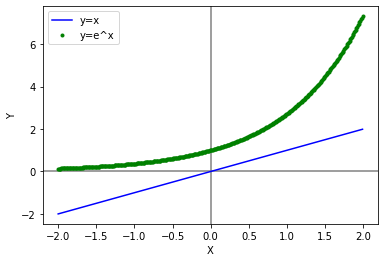

In [ ]:
# 모델만들기

# softmax - 분류에서 사용함.
# 큰값이 부각되는 효과
# 전체 값은 1.0이 됨
import matplotlib.pyplot as plt
import math
import numpy as np
x = np.arange(-2, 2, 0.01)
e_x = math.e ** x

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, x, 'b-', label='y=x')
plt.plot(x, e_x, 'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
  tf.keras.layers.Dense(units=24, activation='relu'),   
  tf.keras.layers.Dense(units=12, activation='relu') ,
  tf.keras.layers.Dense(units=2, activation='softmax')
])

model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_20 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_21 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 분류하고자 하는 label값이 원핫 일경우  : categorical_crossentropy
# 측정지표 = accuracy
optimizer = tf.keras.optimizers.Adam(lr=0.04)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 3ms/step - loss: 0.7014 - accuracy: 0.8835 - val_loss: 0.2180 - val_accuracy: 0.9246
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.9343 - val_loss: 0.2180 - val_accuracy: 0.9185
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.1849 - accuracy: 0.9374 - val_loss: 0.2037 - val_accuracy: 0.9215
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.1876 - accuracy: 0.9371 - val_loss: 0.2193 - val_accuracy: 0.9377
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.2248 - accuracy: 0.9341 - val_loss: 0.1817 - val_accuracy: 0.9385
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.1584 - accuracy: 0.9433 - val_loss: 0.1818 - val_accuracy: 0.9408
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.9412 - val_loss: 0.2039 - val_accuracy: 0.9423
Epoch 

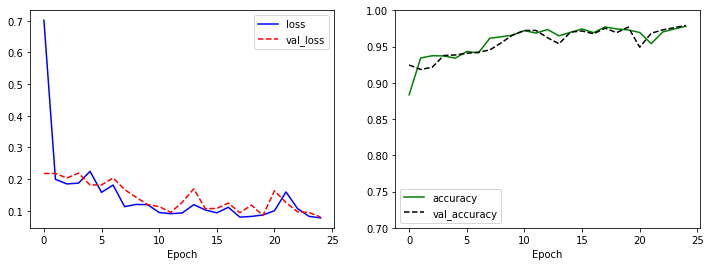

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()


In [ ]:
import numpy as np
# 훈련된 모델로 예측값 수행
results = model.predict(test_X)

# 예측값 중에서 가장 큰 값의 인덱스값을 b에 넣음
b = np.argmax(results, axis=-1)

print(b[:10])  # 예측한 값의 결과
print("-----------")
print(test_Y[:10])  # 실제 값의 결과

[1 1 1 1 1 1 1 1 0 1]
-----------
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
